# Data Description

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value -is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


### Importing Data and Libraries

In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
print('libraries imported!')

libraries imported!


In [547]:
features_data = pd.read_csv(r'C:\Users\clyde\OneDrive\Desktop\Forecasting\features.csv') 
stores_data = pd.read_csv(r'C:\Users\clyde\OneDrive\Desktop\Forecasting\stores.csv')
train_data =pd.read_csv(r'C:\Users\clyde\OneDrive\Desktop\Forecasting\train.csv')
test_data = pd.read_csv(r'C:\Users\clyde\OneDrive\Desktop\Forecasting\test.csv')

features = pd.DataFrame(features_data)
stores = pd.DataFrame(stores_data)
train= pd.DataFrame(train_data)
test= pd.DataFrame(test_data)
features.head() #examine first 5 rows

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [548]:
print(features.shape)
features.isnull().sum() #determine how many null values in dataset

(8190, 12)


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [549]:
features.set_index('Date', inplace=True)
print(features.CPI.median(),features.CPI.mean()) #compare mean and median of CPI

182.7640032 172.46080918276078


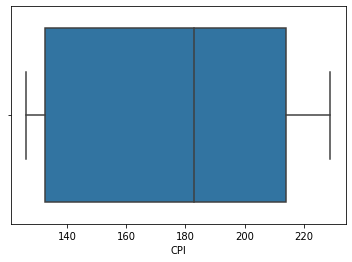

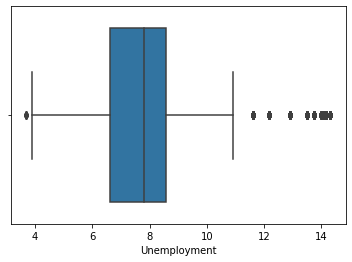

In [550]:
plt.figure(1)
sns.boxplot(features.CPI) #No outliers
plt.figure(2)
sns.boxplot(features.Unemployment) #Less then 10 outliers in the data

In [551]:
#replace null values with median column values
features['CPI'].fillna(features.CPI.median(), inplace=True) 
features['Unemployment'].fillna(features.Unemployment.median(), inplace=True) 

In [552]:
features.isnull().sum()
list = ['1','2','3','4','5']
for i in range(len(list)):
    for item in list: #replace null values in markdown columns with 0, null values indicate no markdown
        features['MarkDown%s'%item].fillna(0,inplace=True) 

In [553]:
features.isnull().sum() #no null values

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [554]:
stores.isnull().sum() #no null values

Store    0
Type     0
Size     0
dtype: int64

In [555]:
train_df = train.iloc[:len(features)]
train_df.set_index('Date', inplace=True)
df = pd.merge(train_df,features, left_index=True,right_index=True,how='outer') #merge data set on dates
df.head()

,Store_x,Dept,Weekly_Sales,IsHoliday_x,Store_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,
2010-02-05,1.0,1.0,24924.5,False,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,1.0,1.0,24924.5,False,2,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,1.0,1.0,24924.5,False,3,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False
2010-02-05,1.0,1.0,24924.5,False,4,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,False
2010-02-05,1.0,1.0,24924.5,False,5,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False


In [556]:
'''Function plotting each column against sales'''
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

In [561]:
'''examine to see if any correlations between weekly sales that may later affect model'''
df.corr()['Weekly_Sales'] 

Store_x                  NaN
Dept           -1.737203e-01
Weekly_Sales    1.000000e+00
Store_y        -3.649877e-18
Temperature    -2.911451e-02
Fuel_Price     -7.692420e-03
MarkDown1       1.032629e-02
MarkDown2      -1.019656e-04
MarkDown3       2.705174e-02
MarkDown4       1.062029e-02
MarkDown5       8.943110e-03
CPI            -7.616843e-05
Unemployment    1.078526e-03
IsHoliday_y     2.290183e-02
Name: Weekly_Sales, dtype: float64

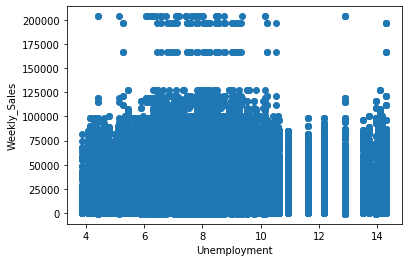

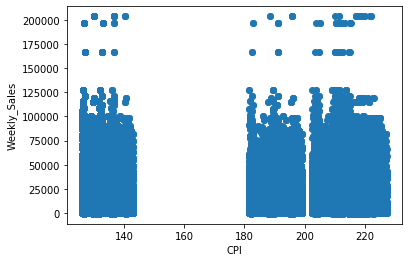

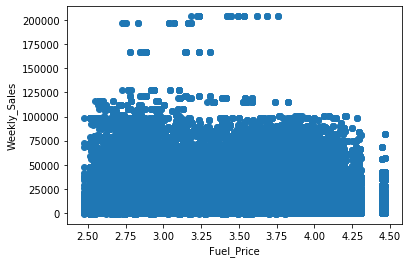

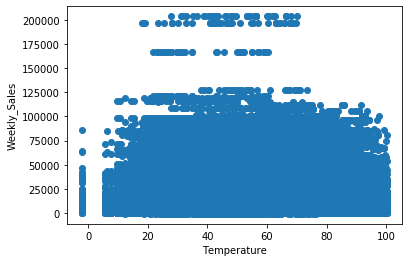

In [562]:
scatter(df,'Unemployment') #scatter plot for each model
scatter(df,'CPI')
scatter(df,'Fuel_Price')
scatter(df,'Temperature')

Correct weekly sales amount by CPI value

In [563]:
df['Weekly_Sales'] = (df['Weekly_Sales']/df['CPI'])*df['CPI'].iloc[-1] #adjust sales based on CPI
df.head()

,Store_x,Dept,Weekly_Sales,IsHoliday_x,Store_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,
2010-02-05,1.0,1.0,21579.251469,False,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,1.0,1.0,21614.448805,False,2,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,1.0,1.0,21244.276188,False,3,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False
2010-02-05,1.0,1.0,36026.787571,False,4,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,False
2010-02-05,1.0,1.0,21522.399808,False,5,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False


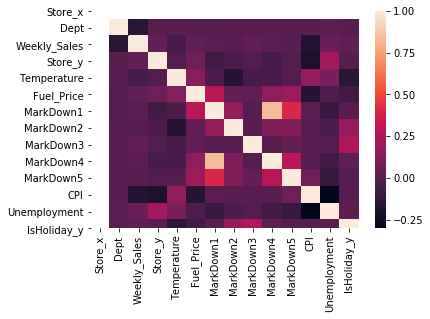

In [564]:
sns.heatmap(df.corr()) #map any correlations

Now with the sales adjusted we can examine the relationships better

In [565]:
sales = df['Weekly_Sales'].reindex(df.index) 
sales.head()

Date
2010-02-05    21579.251469
2010-02-05    21614.448805
2010-02-05    21244.276188
2010-02-05    36026.787571
2010-02-05    21522.399808
Name: Weekly_Sales, dtype: float64

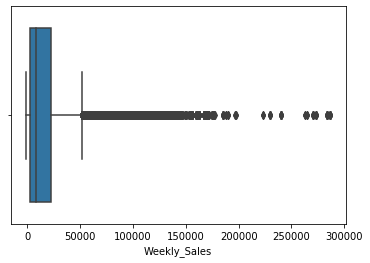

In [566]:
sns.boxplot(x=df.Weekly_Sales) #find outliers and quick stats on sales

In [567]:
df.reset_index(inplace=True)

In [568]:
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format=True) #transofrm date data to datetime format
df = df[:-1780] #removes dates after cutoff year
high = df[df['Weekly_Sales'] > 30000] #seperate high and low values
low = df[df['Weekly_Sales'] <= 30000]

C:\Users\clyde\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\clyde\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


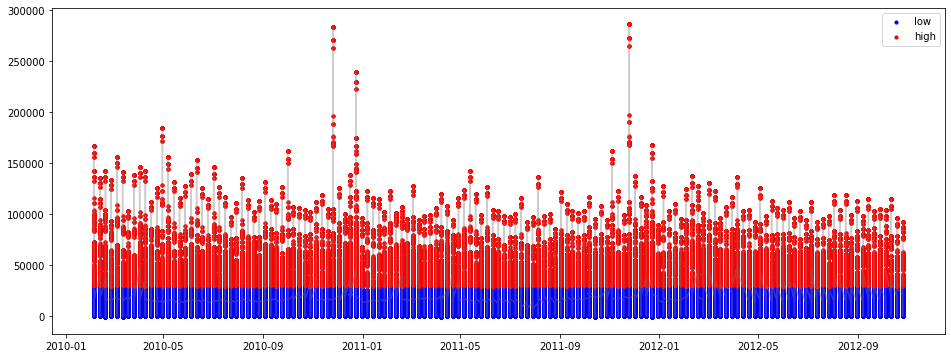

In [569]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
plt.scatter(low['Date'],low['Weekly_Sales'], c='blue',s=10,label='low')
plt.scatter(high['Date'],high['Weekly_Sales'], c='r', s=10,label='high')
plt.legend()

In [570]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def plot(data): #Function to create plot of sales against time
    x = data.reset_index()['Date']
    high = data[data['Weekly_Sales'] > data['Weekly_Sales'].median()]['Weekly_Sales']
    low = data[data['Weekly_Sales'] <= data['Weekly_Sales'].median()]['Weekly_Sales']
    plt.figure(figsize=(16,6))
    plt.plot(x, data['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
    plt.scatter(low.index,low.values, c='blue',s=10,label='low')
    plt.scatter(high.index,high.values, c='r', s=10,label='high')
    plt.margins(x=0.01,y=0.2)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

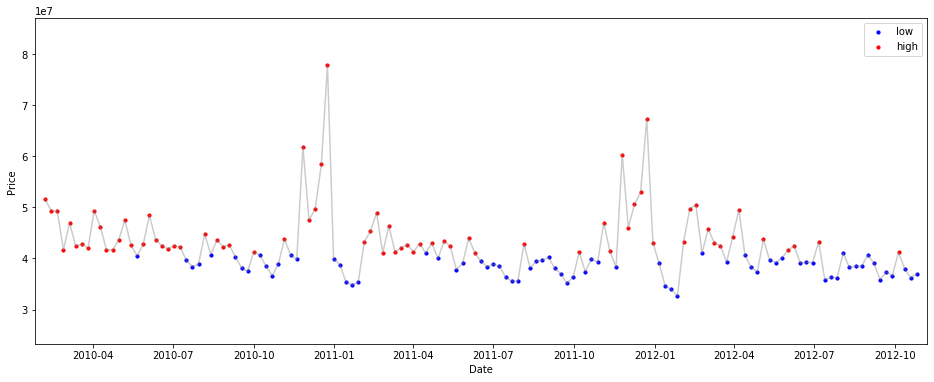

In [571]:
group = df.groupby(by='Date').sum()
plot(group)

From April 2010-April 2011, sales were mainly past the median value. Sales started to stay rather consitent throughout with some notable high values during the holidays.

# Forecasting

In [572]:
def drift(data,lag): #drift method for forecasting
    return data['Weekly_Sales'].iloc[-1]+lag*((data['Weekly_Sales'].iloc[-1]- \
                    data['Weekly_Sales'].iloc[0])/(len(data['Weekly_Sales']-1)))

In [573]:
print(round(drift(group,300),2), ' is the Company wide weekly sales amount \n', \
      round(drift(df,300),2) ,' by store') #examine probable weekly sales according to drift value

6291865.66  is the Company wide weekly sales amount 
 24771.98  by store


# Model and Evaluation

The competition requires that the weighted mean absolute error be used to evaluate the models.

In [574]:
def wmae(data, x, x_pred):
    weights = data.IsHoliday.apply(lambda x:5 if x is True else 1)
    return np.round(np.sum(weights*abs(x-x_pred))/(np.sum(weights)), 2)

In [575]:
x = df[['Store_y', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment']]
y = df['Weekly_Sales']
'''train test split!'''
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1234)

In [576]:
import xgboost as xgb
#fit the data
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [577]:
from xgboost import plot_importance, plot_tree
y_pred = reg.predict(x_test) #predicted sales values stored in array y_pred

In [578]:
wmae(test, y_test, y_pred) #weight mean absolute error

722.67

The value provided is very impressive, and shows that this is a good model to determine future sales

Text(0.5, 1.0, 'Correlation of Predicted Values Against Real Sales: XGBooster Model')

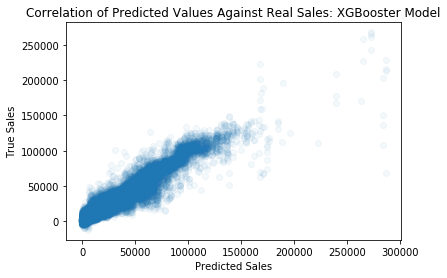

In [579]:
plt.scatter(y_test, y_pred, alpha = 0.05)
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('Correlation of Predicted Values Against Real Sales: XGBooster Model')

The linearity of the plot suggest that the predicted values are very similar to the observed values

In [580]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor() #use random forest model
reg2.fit(x_train,y_train) #fit model
y_pred2 = reg2.predict(x_test) #predict sales
wmae(test, y_test, y_pred2) #calculate error/evaluate model

C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


558.89

An even smaller error!

Text(0.5, 1.0, 'Correlation of Predicted Values Against Real Sales: Random Forest Model')

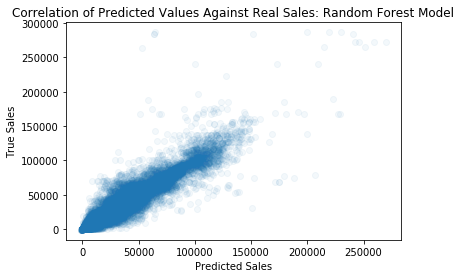

In [581]:
plt.scatter(y_pred2, y_test, alpha = 0.05)
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('Correlation of Predicted Values Against Real Sales: Random Forest Model')

Similarily to the previous model, we see a linear relation between the predicted and true values. Finding the slope will show what multiple the relation has.

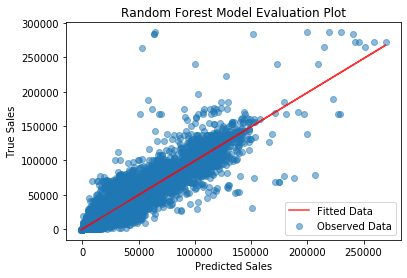

Slope is:  0.9932


In [584]:
def lin(x,a,b): #linear function
    return (a*x)+b
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lin, y_pred2, y_test) #fit data to linear function
plt.scatter(y_pred2, y_test, alpha = 0.5, label='Observed Data') #graph as above
plt.plot(y_pred2, lin(y_pred2, *popt), alpha = 0.8,c='r', label='Fitted Data') #display linear function
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.legend()
plt.title('Random Forest Model Evaluation Plot')
plt.show()
print('Slope is: ', round(popt[0],4)) #print slope

We obtained a slope of ~0.99. This shows that the model is almost exact at predicting future sales values.

# Submission Formatting

In [583]:
test = test[:len(y_pred2)]
test['Weekly_Sales'] = y_pred2
test['id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) \
+ '_' +  test['Date'].astype(str)
sub = test[['id', 'Weekly_Sales']]
sub.set_index(['id'])
sub.to_csv('Walmart Sales Forecast.csv')